1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

# to limit the printout
%precision 4
np.set_printoptions(suppress=True)

eigenval: [25.0996  0.      1.8957] [25.1002  1.9006  0.    ] 
eigenvec: [[-0.1155 -0.8165  0.5657]
 [-0.5773 -0.4082 -0.7072]
 [-0.8083  0.4082  0.4242]] [[-0.1156  0.5657 -0.8165]
 [-0.5772 -0.7072 -0.4082]
 [-0.8084  0.4241  0.4082]]
eigenvalue: 25.099571012581876    variability ratio: 0.9297751828633589
eigenvalue: 5.019129948318635e-16    variability ratio: 1.8592598507654264e-17
eigenvalue: 1.8957408382728738    variability ratio: 0.07022481713664104


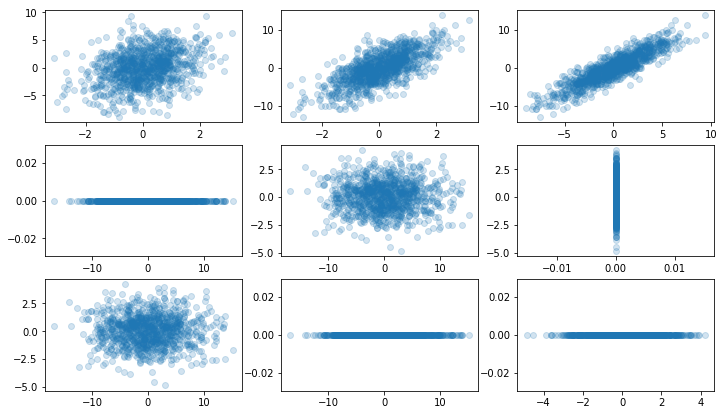

In [34]:
N=1000
v=np.zeros((3,N))
v[0,:]=np.random.normal(0,1, N)
v[1,:]=v[0,:]+np.random.normal(0,3, N)
v[2,:]=2*v[0,:]+v[1,:]


cv=np.cov(v)

l, V = np.linalg.eig(np.cov(v))    #using built-in eig method
U, spectrum, Vt = np.linalg.svd(v)  #using SVD and then rescaling
l_svd = spectrum**2/(N-1)
V_svd = U

print('eigenval:', l, l_svd, '\neigenvec:', V, V_svd)    #they are the same, just two cols swapped

for lam in l:
    print('eigenvalue:', lam, '   variability ratio:', lam/l.sum())
#it is consistent with how the dataset was built: one variable is linearly dependent on the others     

#retain the 99% of variability
vr = np.dot(V.T, v)      # rotate all the data points accordingly to the new base
vr2 = np.dot(V_svd.T, v)


fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 7))
ax00, ax01, ax02, ax10, ax11, ax12, ax20, ax21, ax22=axs.flatten()
#original data
ax00.scatter(v[0,:], v[1,:], alpha=0.2)
ax01.scatter(v[0,:], v[2,:], alpha=0.2)
ax02.scatter(v[1,:], v[2,:], alpha=0.2)
#rotated data (see both with direct eig method on cov matrix and svd)
ax10.scatter(vr[0,:], vr[1,:], alpha=0.2) 
ax11.scatter(vr[0,:], vr[2,:], alpha=0.2) 
ax12.scatter(vr[1,:], vr[2,:], alpha=0.2) 
ax20.scatter(vr2[0,:], vr2[1,:], alpha=0.2) 
ax21.scatter(vr2[0,:], vr2[2,:], alpha=0.2) 
ax22.scatter(vr2[1,:], vr2[2,:], alpha=0.2) 
plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

eigenval: [26.7596  2.0045  0.002   0.0015  0.0012  0.0009  0.0006  0.0004  0.0002
 -0.      0.0001  0.      0.    ] 
eigenvec: [[ 0.1215 -0.5644 -0.0008  0.0001 -0.0005  0.0002 -0.0002 -0.0003 -0.0001
  -0.8165  0.0001  0.0001  0.    ]
 [ 0.5697  0.7132  0.0012 -0.0003  0.0005 -0.0003  0.0001  0.0004  0.0001
  -0.4082 -0.0002 -0.0001  0.    ]
 [ 0.8128 -0.4156 -0.0004 -0.0002 -0.0006  0.0002 -0.0002 -0.0001  0.
   0.4082  0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      1.    ]
 [-0.     -0.0001 -0.0038 -0.0039  0.0042  0.0088 -0.0001 -0.0205 -0.0064
  -0.     -0.0027 -0.9997  0.    ]
 [-0.     -0.0002  0.0029  0.0021  0.0037 -0.0007 -0.002   0.0147 -0.0339
  -0.     -0.9993  0.0026  0.    ]
 [-0.0001 -0.     -0.0286  0.0039 -0.0437 -0.0246  0.0311 -0.0936  0.9928
   0.     -0.0353 -0.0046  0.    ]
 [ 0.0001  0.0006 -0.0297  0.0201 -0.0374 -0.0719 -0.0945 -0.9868 -0.0947
  -0.     -0.0112  0.0201  0.    ]
 [-0.000

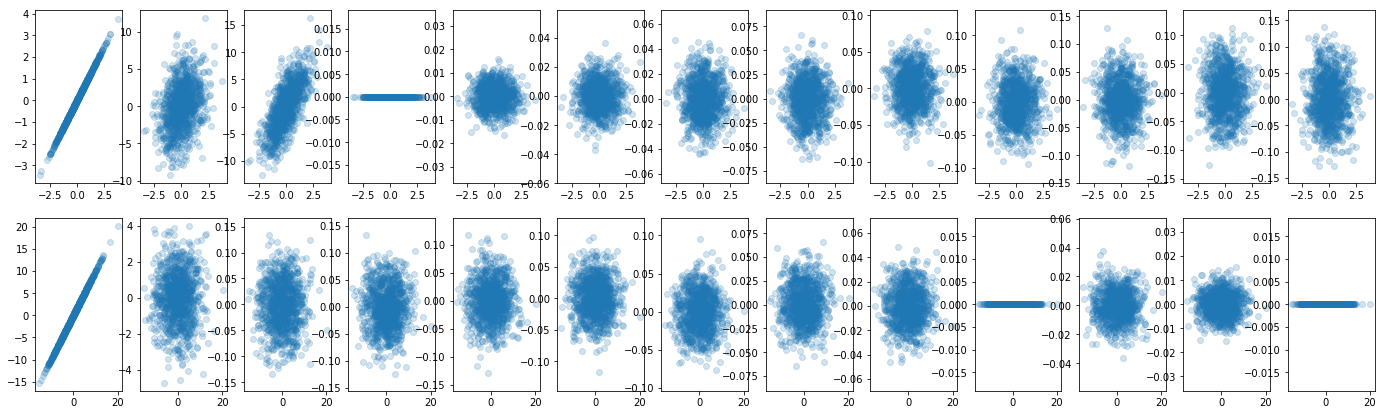

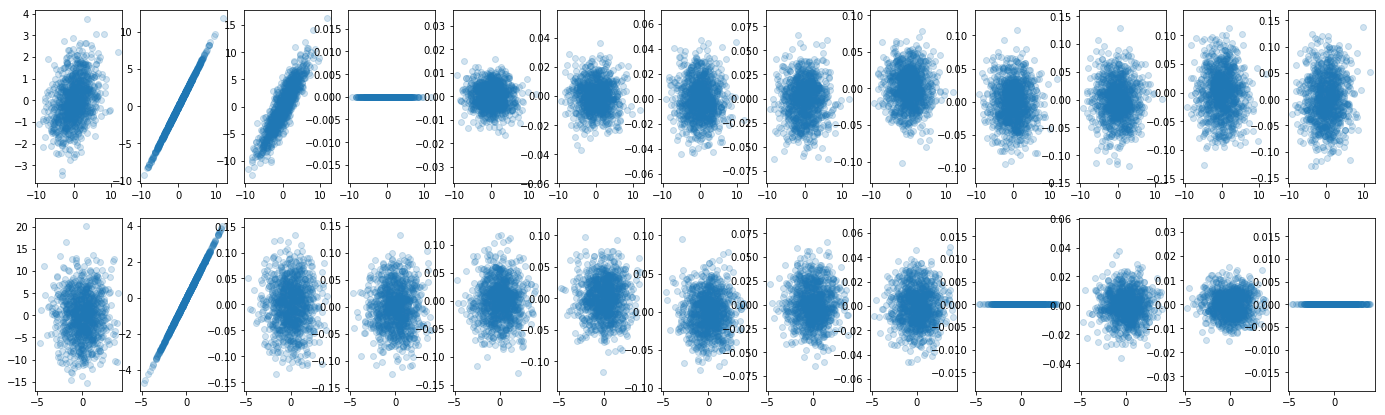

In [48]:
N=1000
v=np.zeros((3+10,N))
v[0,:]=np.random.normal(0,1, N)
v[1,:]=v[0,:]+np.random.normal(0,3, N)
v[2,:]=2*v[0,:]+v[1,:]
for i in range(10):     #add uncorrelated variables
    v[3+i,:]=np.random.normal(0,i/200, N)

cv=np.cov(v)

l, V = np.linalg.eig(np.cov(v))    #using built-in eig method

print('eigenval:', l, '\neigenvec:', V)   

for lam in l:
    print('eigenvalue:', lam, '   variability ratio:', lam/l.sum())
#it is consistent with how the dataset was built: only one variable is linearly dependent on the others     

#retain the 99% of variability
vr = np.dot(V.T, v)      # rotate all the data points accordingly to the new base


fig0, axs0 = plt.subplots(nrows=2, ncols=13, figsize=(24, 7))


for i in range(13):
    axs0[0, i].scatter(v[0,:], v[i,:], alpha=0.2)      #original data x1 vs all
    axs0[1, i].scatter(vr[0,:], vr[i,:], alpha=0.2)    #rotated data xr1 vs all
    
fig1, axs1 = plt.subplots(nrows=2, ncols=13, figsize=(24, 7))


for i in range(13):
    axs1[0, i].scatter(v[1,:], v[i,:], alpha=0.2)      #original data x1 vs all
    axs1[1, i].scatter(vr[1,:], vr[i,:], alpha=0.2)    #rotated data xr1 vs all
plt.show()
plt.show()

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 